# <font color='red'>Warning control</font>

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# <font color='red'>Librairies and data importation</font>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [3]:
# dataset importation
df = pd.read_csv('Data/NHANES.csv')

<AxesSubplot:>

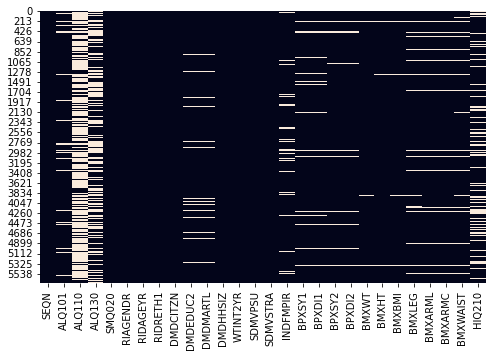

In [4]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cbar=False)

In [5]:
df.isnull().sum();

In [6]:
# Marital
df['DMDMARTL'] = df['DMDMARTL'].replace(
    {1.0:'Married', 2.0:'Widowed', 
    3.0:'Divorced', 4.0:'Separated',
    5.0:'Never married', 6.0:'Living with partner', 
    77.0:'Refused', np.nan:'Missing'})

# Gender
df['RIAGENDR'] = df['RIAGENDR'].replace({1:'Male', 2:'Female'})

# DMDEDUC2 variable : Academic level
df['DMDEDUC2'] = df['DMDEDUC2'].replace(
    {5.0:'College',  3.0:'HS/GED',  4.:'Some college/AA',  
     2.0:'9-11', np.nan:'Missing',  1.0:'<9',  
     9:"Don't know"})

# Inputation of missing values
df.fillna(df.mean(), inplace=True)

# check our new dataset
df.isna().sum();

### <font color='red'>Age distribution and marital status</font>

<AxesSubplot:xlabel='DMDMARTL', ylabel='RIDAGEYR'>

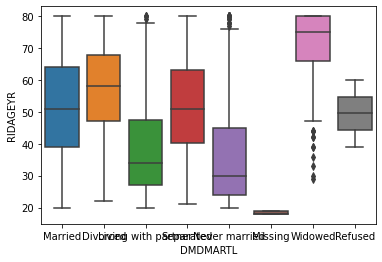

In [7]:
# relation between marital status and age 
sns.boxplot(x='DMDMARTL', y='RIDAGEYR', data=df)

<AxesSubplot:xlabel='DMDMARTL', ylabel='RIDAGEYR'>

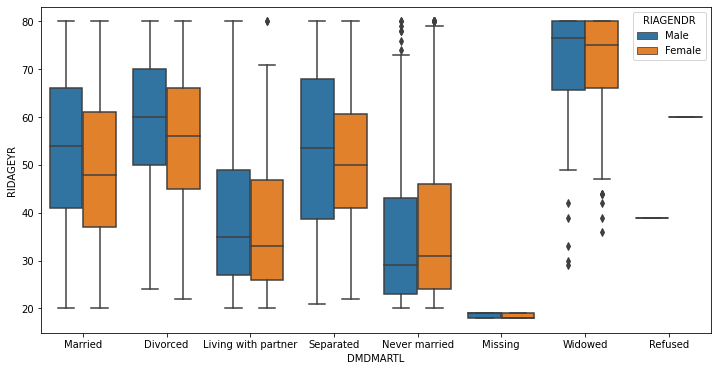

In [8]:
# relation between marital status and age based on gender
plt.figure(figsize=(12, 6))
sns.boxplot(x='DMDMARTL', y='RIDAGEYR', hue='RIAGENDR', data=df)

<AxesSubplot:xlabel='DMDMARTL', ylabel='BMXWT'>

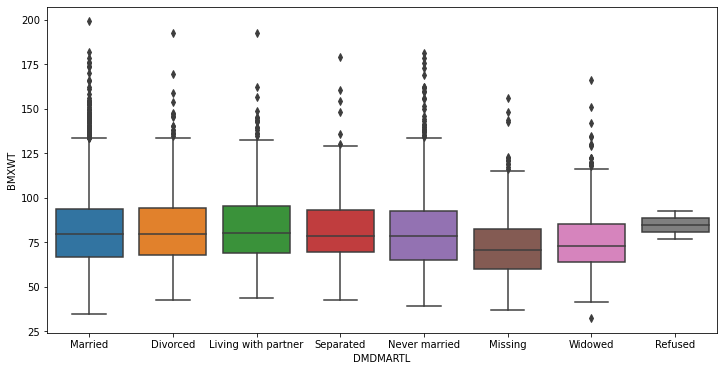

In [9]:
# relation between marital status and weight
plt.figure(figsize=(12, 6))
sns.boxplot(x='DMDMARTL', y='BMXWT', data=df)

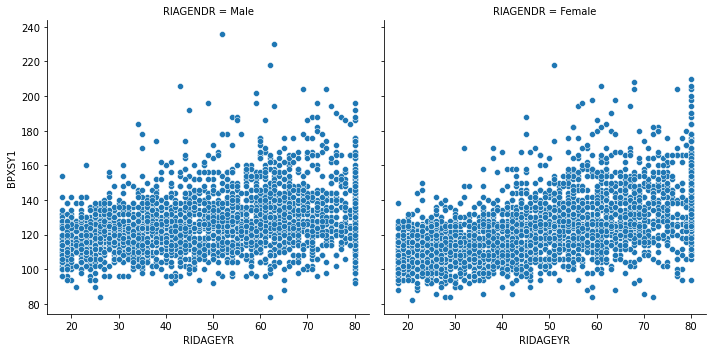

In [10]:
# relation between arterial pressure and on age based on gender
sns.relplot(x='RIDAGEYR', y='BPXSY1', col='RIAGENDR', data=df)

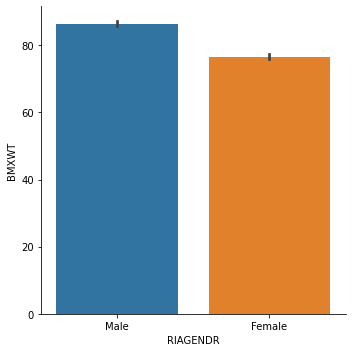

In [11]:
# relation between weight based gender
sns.catplot(x='RIAGENDR', y='BMXWT', kind='bar', data=df)